In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Least squares solution to multiple linear regression models 

In this notebook we'll use the derived least squares solution for parameters of linear regression models, where the linear regression model is given by

$$
\mathbf{y} = \mathbf{X} \mathbf{w}
$$

and the optimal solution for $\mathbf{w}$ is 

$$
\mathbf{w}^* = 
[\mathbf{X}^T \mathbf{X} ]^{-1} \mathbf{X}^T \mathbf{y} 
$$

A good place to start is to define known values for $\mathbf{w}$, generate simulated data, and then test the derived equation to make sure that it recovers the correct values. 

In [2]:
# Define "ground truth" values for w 
w_true = np.array([-3., 2., 1.5, -.5])
w_true

array([-3. ,  2. ,  1.5, -0.5])

In [3]:
### generate simulated data

# number of features
m = len(w_true)

# number of samples
n = 5

### generate random data
X = np.random.randn(n, m)
y = X@w_true

In [4]:
### Use derived equation to solve for w ### 
w_solved = np.linalg.inv(X.T @ X) @ X.T @ y
w_solved

array([-3. ,  2. ,  1.5, -0.5])

If the number of samples, $n$, is greater than the number of elements in $\mathbf{w}$, the above equation should work. 

# Polynomial curve fitting

Polynomial functions use powers of the independent variable $x$ to model the dependent variable $y$. Parameters $\mathbf{w}$ are used to weight the importance of each power of $x$ for the prediction of $y$. Although the model is a non-linear function of $x$, it is a linear function of $\mathbf{w}$, so we can still use the derived linear regression solution to find $\mathbf{w}$.  

### Define a ground truth model

A ground truth model can be used to generate synthetic data with the intent of mimicking data collection from an experiment. In general, the ground truth model can be a different function from the function we use to model the data. In this case we'll generate data from a sine curve, and then use polynomials to approximate the generated data. This is in analogy to running an experiment to collect data from an unknown function (e.g. sine curve), and then using a model (e.g. polynomial) to fit the data. 

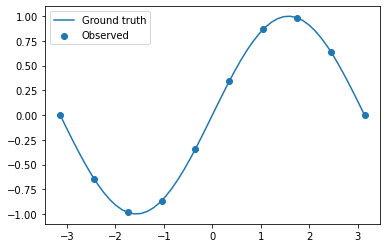

In [5]:
# define number of observations to make
n = 10

x = np.linspace(-np.pi, np.pi)
y_true = np.sin(x)

x_obs = np.linspace(-np.pi, np.pi, n)
y_obs = np.sin(x_obs) 

plt.plot(x, y_true, label="Ground truth")
plt.scatter(x_obs, y_obs, label="Observed")

plt.legend()
plt.show()

Powers of the independent variable, $x$, up to order $m-1$ will make up the $\mathbf{X}$ matrix, where for observation $i$,

$$
y_i = \sum_{j=1}^m w_j x_i^{j-1} 
$$

And for observations $i = 1, ..., n$, we have

$$
\mathbf{y} = 
\begin{bmatrix}
y_1 
\\ \vdots \\ 
y_n 
\end{bmatrix}
= 
\begin{bmatrix}
\sum_{j=1}^m w_j x_1^{j-1} 
\\ \vdots \\
\sum_{j=1}^m w_j x_n^{j-1} 
\end{bmatrix}
= 
\begin{bmatrix}
x_1^{0} \ldots x_1^{m-1} 
\\ \vdots \ddots \vdots \\
x_n^{0} \ldots x_n^{m-1}
\end{bmatrix}
\begin{bmatrix}
w_1
\\ \vdots \\
w_m
\end{bmatrix}
= 
\mathbf{X} \mathbf{w}
$$

An easy way to see that the model is linear with respect to $\mathbf{w}$ is that it can be written in the form $\mathbf{y} = \mathbf{X} \mathbf{w}$ 

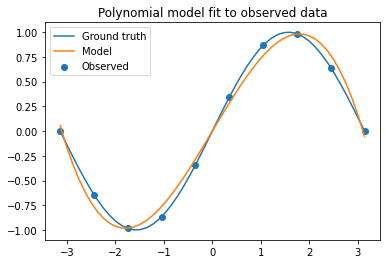

In [6]:
# define order of approximating polynomial 
m = 4

# define matrix X 
X = np.zeros([n, m])
for j in range(m):
    X[:, j] = x_obs**j
    
# solve for regression coefficients 
w_solved = np.linalg.inv(X.T @ X) @ X.T @ y_obs

# make predictions for new values of the input x 
X_pred = np.zeros([len(x), m])
for j in range(m):
    X_pred[:, j] = x**j
y_pred = X_pred@w_solved

# compare to ground truth
plt.plot(x, y_true, label="Ground truth")
plt.scatter(x_obs, y_obs, label="Observed")
plt.plot(x, y_pred, label="Model")
plt.title("Polynomial model fit to observed data")

plt.legend()
plt.show()

As the order of the polynomial increases, the model becomes more flexible and is eventually able to perfectly capture the sine wave. 

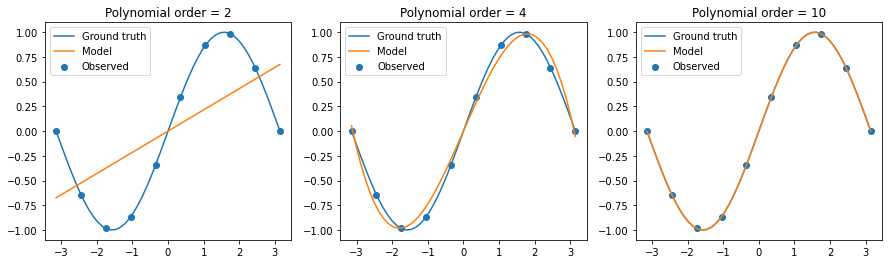

In [7]:
# define order of approximating polynomial 
m_values = [2, 4, 10]

plt.figure(figsize=(15, 4))
for i, m in enumerate(m_values):
    # define matrix X 
    X = np.zeros([n, m])
    for j in range(m):
        X[:, j] = x_obs**j

    # solve for regression coefficients 
    w_solved = np.linalg.inv(X.T @ X) @ X.T @ y_obs

    # make predictions for new values of the input x 
    X_pred = np.zeros([len(x), m])
    for j in range(m):
        X_pred[:, j] = x**j
    y_pred = X_pred@w_solved

    # compare to ground truth
    plt.subplot(1, 3, i+1)
    plt.plot(x, y_true, label="Ground truth")
    plt.scatter(x_obs, y_obs, label="Observed")
    plt.plot(x, y_pred, label="Model")
    plt.legend()
    plt.title(f"Polynomial order = {m}")
plt.show()

When the order of the polynomial is 10, it perfectly captures the observed values. Does that mean that it's a better model to use than the polynomial of order 4? 

# Polynomial curve fitting with noisy observations

In the previous example, we generated data from a sine curve where $y = \mathrm{sine}(x)$ as an example of a ground truth function. In practice, observations will almost always be corrupted by measurement *noise*, which means that the observed values will deviate slightly from the ground truth value. We can model these deviations as a zero-mean Gaussian random variable, $\varepsilon \sim \mathcal{N}(0, \sigma^2)$, so that

$$
y = \mathrm{sine}(x) + \varepsilon
$$

The magnitude of $\sigma^2$ determines the amount of variation in the measurement noise. 

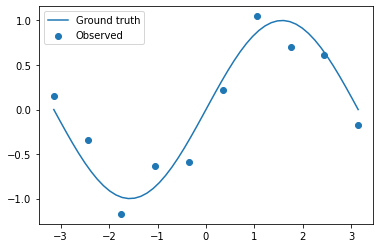

In [8]:
# define number of observations to make
n = 10
sigma = .2

x = np.linspace(-np.pi, np.pi)
y_true = np.sin(x)

x_obs = np.linspace(-np.pi, np.pi, n)
y_obs = np.sin(x_obs) + sigma*np.random.randn(n)

plt.plot(x, y_true, label="Ground truth")
plt.scatter(x_obs, y_obs, label="Observed")

plt.legend()
plt.show()

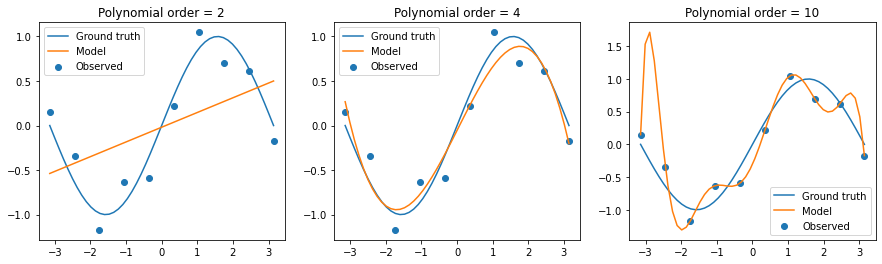

In [9]:
# define order of approximating polynomial 
m_values = [2, 4, 10]

plt.figure(figsize=(15, 4))
for i, m in enumerate(m_values):
    # define matrix X 
    X = np.zeros([n, m])
    for j in range(m):
        X[:, j] = x_obs**j

    # solve for regression coefficients 
    w_solved = np.linalg.inv(X.T @ X) @ X.T @ y_obs

    # make predictions for new values of the input x 
    X_pred = np.zeros([len(x), m])
    for j in range(m):
        X_pred[:, j] = x**j
    y_pred = X_pred@w_solved

    # compare to ground truth
    plt.subplot(1, 3, i+1)
    plt.plot(x, y_true, label="Ground truth")
    plt.scatter(x_obs, y_obs, label="Observed")
    plt.plot(x, y_pred, label="Model")
    plt.legend()
    plt.title(f"Polynomial order = {m}")
plt.show()

Now that there's measurement noise, the 10th degree polynomial still captures the observed values perfectly, but fails to capture the ground truth function. This phenomenon is called *over-fitting* because the model is fit to perfectly capture measurement noise and not the underlying function. While over-fit models perfectly capture the observed values, they do not generalize well to new circumstances and therefore provide poor models for making predictions in unobserved circumstances. 

On the other hand, the polynomial of order 2 also fails to capture the ground truth function. In this case the model was not flexible enough, and so the model is considered *under fit*.

Determining the appropriate degree of model complexity to capture noisy data is a major challenge when fitting models to data. 